In [1]:
#import libraries

###
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


housing_data = pd.read_csv("data.csv") 
housing_dataframe = pd.DataFrame(housing_data)
zillow_data = pd.read_csv("zillow_data_CA.csv")
zillow_dataframe = pd.DataFrame(zillow_data)


In [2]:
housing_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
#head (10 first rows for an idea to actually eyeball data)
housing_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [4]:
#check last 10 rows
housing_dataframe.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [5]:
#check if there is missing value(null) of each column
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
#check unique of data
for col in housing_dataframe.columns:
    print(col, len(housing_dataframe[col].unique()), housing_dataframe[col].unique())

Id 2919 [   1    2    3 ... 2917 2918 2919]
MSSubClass 16 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
MSZoning 6 ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
LotFrontage 129 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
LotArea 1951 [ 8450  9600 11250 ...  1894 20000 10441]
Street 2 ['Pave' 'Grvl']
Alley 3 [nan 'Grvl' 'Pave']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 

In [7]:
#check the types of data
housing_dataframe.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

# Visualizations:

Text(0.5, 1.0, 'Sale Type')

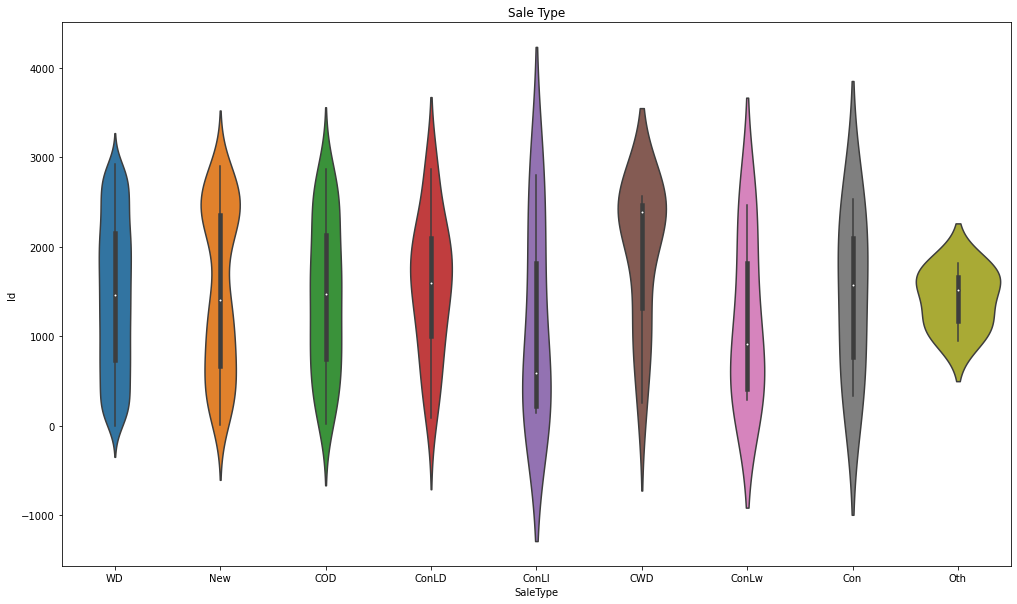

In [8]:
plt.figure(figsize=(17,10))
sns.violinplot(x='SaleType', y='Id', data=housing_dataframe).set_title('Sale Type')

Text(0.5, 1.0, 'Sale Condition')

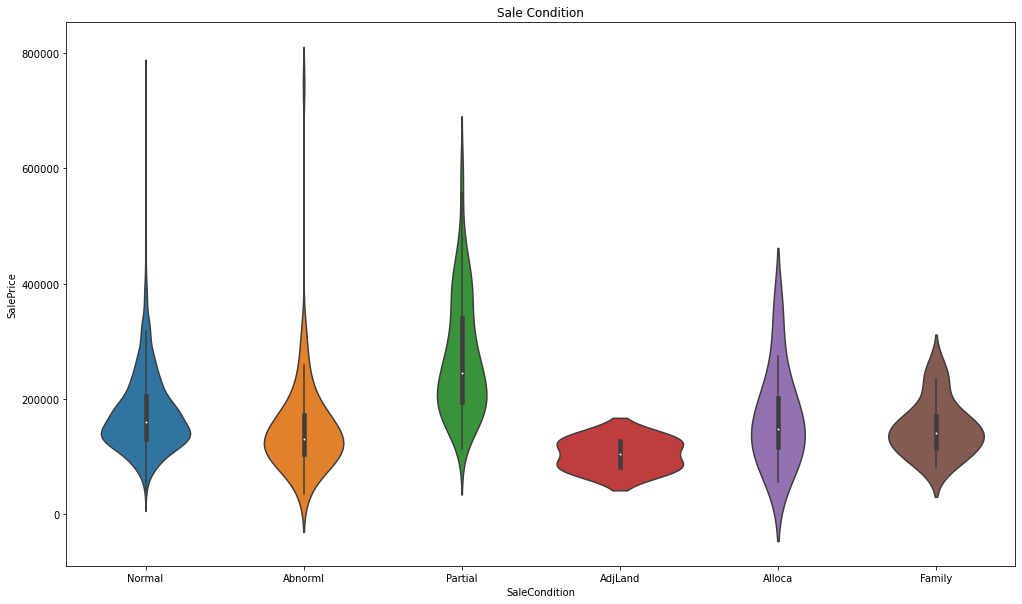

In [9]:

plt.figure(figsize=(17,10))
sns.violinplot(x='SaleCondition', y='SalePrice', data=housing_dataframe).set_title('Sale Condition')

In [10]:
#create date for data
housing_dataframe['Day'] = 1
housing_dataframe['Date'] = housing_dataframe['YrSold'].astype(str) +'-'+housing_dataframe['MoSold'].astype(str)

In [11]:
#convert date from object to date type
housing_dataframe['Date'] = pd.to_datetime(housing_dataframe['Date'])

In [12]:
#check if the date is datetime columns
housing_dataframe.dtypes

Id                        int64
MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
                      ...      
SaleType                 object
SaleCondition            object
SalePrice               float64
Day                       int64
Date             datetime64[ns]
Length: 83, dtype: object

In [13]:
#check the date column
housing_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Day,Date
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,2008-12-01
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,1,2009-10-01
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000.0,1,2007-08-01
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Shed,350,11,2009,WD,Normal,200000.0,1,2009-11-01
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,1,2008-04-01
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,1,2008,WD,Normal,118000.0,1,2008-01-01


Text(0.5, 1.0, 'Normal Sale Condition')

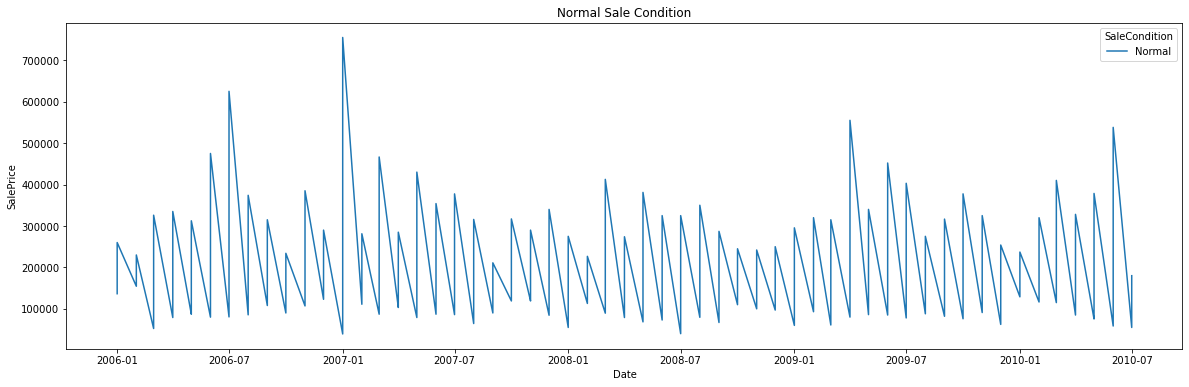

In [14]:
#check the normal condition sale price
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y= 'SalePrice',hue = 'SaleCondition',estimator = None, data = housing_dataframe[housing_dataframe['SaleCondition']=='Normal']).set_title('Normal Sale Condition')

Text(0.5, 1.0, 'Abnormal Sale Condition')

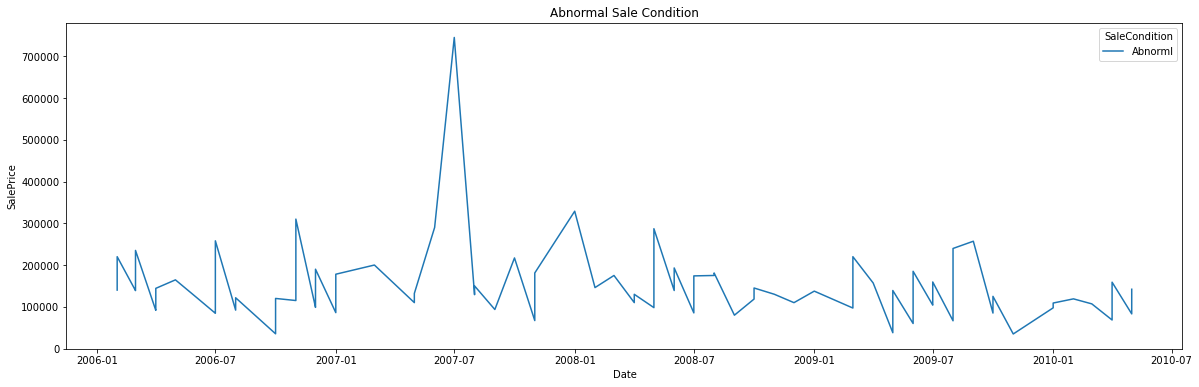

In [15]:
#check the abnormal condition sale price
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y= 'SalePrice',hue = 'SaleCondition',estimator = None, data = housing_dataframe[housing_dataframe['SaleCondition']=='Abnorml']).set_title('Abnormal Sale Condition')

# Extention 1: Linear Regression

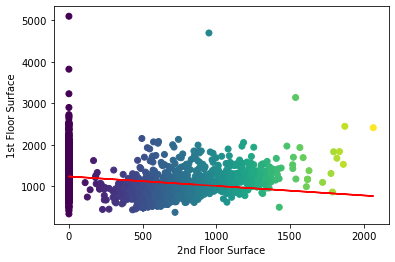

In [16]:
#Linear Regression comparing the first floor and second floor surfaces
X = housing_dataframe.iloc[:, 44].values.reshape(-1, 1)
Y = housing_dataframe.iloc[:, 43].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)# make predictions
plt.xlabel('2nd Floor Surface')
plt.ylabel('1st Floor Surface')
plt.scatter(X, Y, c = X)
plt.plot(X, Y_pred, color='red')
plt.show()

In [17]:
year_2007 = housing_dataframe[housing_dataframe['YrSold'] == 2007]

In [18]:
year_2008 = housing_dataframe[housing_dataframe['YrSold'] == 2008]

In [19]:
sale_2008 = year_2008[['YrSold','MoSold', 'SalePrice']]
clean_2008 = sale_2008.dropna()

In [20]:
sale_2007 = year_2007[['YrSold','MoSold', 'SalePrice']]
clean_2007 = sale_2007.dropna()

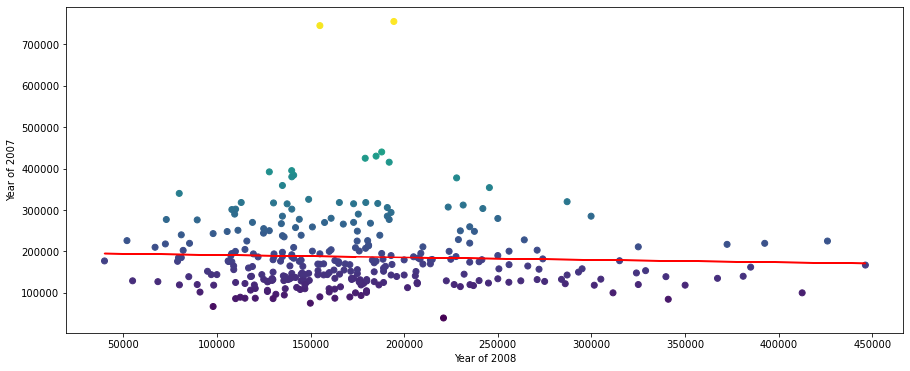

In [21]:
#Linear Regression 
#comparing the sale price for the year of 2007 and 2008
X = clean_2008.iloc[:300, 2].values.reshape(-1, 1)
Y = clean_2007.iloc[:300, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.figure(figsize=(15,6))
plt.scatter(X, Y, c = Y)
plt.plot(X, Y_pred, color= 'red')
plt.xlabel('Year of 2008')
plt.ylabel('Year of 2007')


plt.show()

In [22]:
clean_lotarea = housing_dataframe[['Id','LotArea','SalePrice']].dropna()

In [23]:
clean_lotarea

,Id,LotArea,SalePrice
0,1,8450,208500.0
1,2,9600,181500.0
2,3,11250,223500.0
3,4,9550,140000.0
4,5,14260,250000.0
...,...,...,...
1455,1456,7917,175000.0
1456,1457,13175,210000.0
1457,1458,9042,266500.0
1458,1459,9717,142125.0


In [24]:
clean_area = clean_lotarea.sort_values(by=['LotArea'])

In [25]:
clean_area

,Id,LotArea,SalePrice
956,957,1300,124000.0
1039,1040,1477,80000.0
614,615,1491,75500.0
489,490,1526,86000.0
1449,1450,1533,92000.0
...,...,...,...
451,452,70761,280000.0
706,707,115149,302000.0
249,250,159000,277000.0
335,336,164660,228950.0


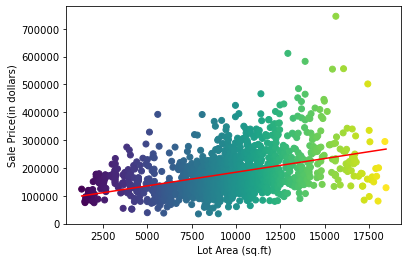

In [26]:
#Linear Regression comparing the first floor and second floor surfaces
X = clean_area.iloc[:1400, 1].values.reshape(-1, 1)
Y = clean_area.iloc[:1400, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)# make predictions
plt.xlabel('Lot Area (sq.ft)')
plt.ylabel('Sale Price(in dollars)')
plt.scatter(X, Y, c = X)
plt.plot(X, Y_pred, color='red')
plt.show()

Print OLS to check on R^2

In [27]:
x = clean_area['LotArea'].tolist()
y = clean_area['SalePrice'].tolist()
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.12e-24
Time:                        15:35:58   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

# Linear Regression of Lot area in each year

In [28]:
clean_Area = housing_dataframe[['Id','LotArea','YrSold','SalePrice']].dropna()

In [29]:
clean_Area 

,Id,LotArea,YrSold,SalePrice
0,1,8450,2008,208500.0
1,2,9600,2007,181500.0
2,3,11250,2008,223500.0
3,4,9550,2006,140000.0
4,5,14260,2008,250000.0
...,...,...,...,...
1455,1456,7917,2007,175000.0
1456,1457,13175,2010,210000.0
1457,1458,9042,2010,266500.0
1458,1459,9717,2010,142125.0


In [30]:
clean_area = clean_Area.sort_values(by=['LotArea'])

In [31]:
filtered_Lotarea = clean_area.loc[(clean_area["SalePrice"] < 500000) & (clean_area["LotArea"] < 60000)]

In [32]:
filtered_Lotarea 

,Id,LotArea,YrSold,SalePrice
956,957,1300,2009,124000.0
1039,1040,1477,2009,80000.0
614,615,1491,2010,75500.0
489,490,1526,2009,86000.0
1449,1450,1533,2006,92000.0
...,...,...,...,...
661,662,46589,2009,402000.0
53,54,50271,2006,385000.0
384,385,53107,2007,240000.0
457,458,53227,2008,256000.0


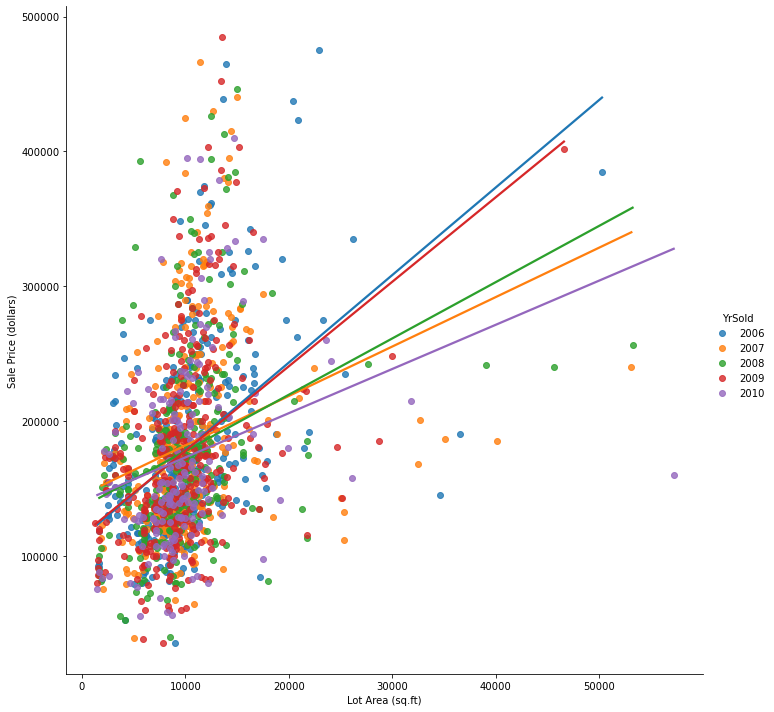

In [33]:
# add regression line per group Seaborn
sns.lmplot(x="LotArea", 
           y="SalePrice", 
           hue="YrSold",
           ci= None,
           data=filtered_Lotarea,
           height = 10)
plt.xlabel("Lot Area (sq.ft)")
plt.ylabel("Sale Price (dollars)")
plt.savefig("LotArea_saleprice.png",
                    format='png',dpi=150)

In [34]:
x = filtered_Lotarea['LotArea'].tolist()
y = filtered_Lotarea['SalePrice'].tolist()
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     192.1
Date:                Sat, 07 May 2022   Prob (F-statistic):           4.19e-41
Time:                        15:36:01   Log-Likelihood:                -18114.
No. Observations:                1445   AIC:                         3.623e+04
Df Residuals:                    1443   BIC:                         3.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.296e+05   3906.529     33.184      0.0

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing_dataframe, test_size = .15)
print(len(train))
print(len(test))

2481
438


# Extention 3: comparing visually Zillow and Demo Datasets 

In [36]:
import json
from bs4 import BeautifulSoup

#pd.options.display.max_columns = False
#pd.options.display.max_rows = False

In [37]:
zillow_data = pd.read_csv("zillow_data_CA.csv")
zillow_dataframe = pd.DataFrame(zillow_data)


In [38]:
zillow_dataframe

,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url
0,5237 Springdale Ave,Pleasanton,CA,94588,779000.0,1884.0,4.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
1,3872 Cheshire Ct,Pleasanton,CA,94588,799000.0,2150.0,4.0,3.0,2.0,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
2,7223 Valley View Ct,Pleasanton,CA,94588,799000.0,2119.0,3.0,3.0,NaN,Townhouse For Sale,http://www.zillow.com/homes/for_sale//homedeta...
3,19 Deer Oaks Dr,Pleasanton,CA,94588,2240000.0,2574.0,3.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
4,4354 Addison Way,Pleasanton,CA,94588,928000.0,1603.0,4.0,2.0,2.0,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
...,...,...,...,...,...,...,...,...,...,...,...
525,49 Rinaldo Dr,Vallejo,CA,94589,375000.0,1536.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
526,530 Echo Summit Rd,Vallejo,CA,94589,342500.0,1088.0,3.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
527,College Ave,Vallejo,CA,94589,310000.0,1376.0,4.0,2.0,282.0,Pre-Foreclosure (Auction),http://www.zillow.com/homes/for_sale/116573562...
528,0 Clark Dr,Vallejo,CA,94589,205000.0,7405.0,NaN,NaN,NaN,Lot/Land For Sale,http://www.zillow.com/homes/for_sale//homedeta...


In [39]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         530 non-null    object 
 1   city            530 non-null    object 
 2   state           530 non-null    object 
 3   zip             530 non-null    int64  
 4   price           447 non-null    float64
 5   sqft            509 non-null    float64
 6   bedrooms        507 non-null    float64
 7   bathrooms       505 non-null    float64
 8   days_on_zillow  306 non-null    float64
 9   sale_type       530 non-null    object 
 10  url             530 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 45.7+ KB


Change the headings to be similar to the housing dataframe

In [40]:
zillow_dataframe.rename(columns={'price': 'SalePrice',
                   'sqft': 'LotArea', 'bedrooms':'BedroomAbvGr', 'bathrooms':'FullBath'},
          inplace=True, errors='raise')

In [41]:
zillow_dataframe

,address,city,state,zip,SalePrice,LotArea,BedroomAbvGr,FullBath,days_on_zillow,sale_type,url
0,5237 Springdale Ave,Pleasanton,CA,94588,779000.0,1884.0,4.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
1,3872 Cheshire Ct,Pleasanton,CA,94588,799000.0,2150.0,4.0,3.0,2.0,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
2,7223 Valley View Ct,Pleasanton,CA,94588,799000.0,2119.0,3.0,3.0,NaN,Townhouse For Sale,http://www.zillow.com/homes/for_sale//homedeta...
3,19 Deer Oaks Dr,Pleasanton,CA,94588,2240000.0,2574.0,3.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
4,4354 Addison Way,Pleasanton,CA,94588,928000.0,1603.0,4.0,2.0,2.0,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
...,...,...,...,...,...,...,...,...,...,...,...
525,49 Rinaldo Dr,Vallejo,CA,94589,375000.0,1536.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
526,530 Echo Summit Rd,Vallejo,CA,94589,342500.0,1088.0,3.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...
527,College Ave,Vallejo,CA,94589,310000.0,1376.0,4.0,2.0,282.0,Pre-Foreclosure (Auction),http://www.zillow.com/homes/for_sale/116573562...
528,0 Clark Dr,Vallejo,CA,94589,205000.0,7405.0,NaN,NaN,NaN,Lot/Land For Sale,http://www.zillow.com/homes/for_sale//homedeta...


Text(0, 0.5, 'Sale Price (dollars)')

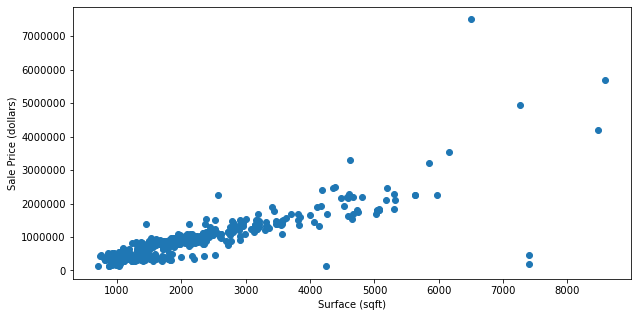

In [42]:

plt.figure(figsize = ((10, 5)))
plt.scatter(x = 'LotArea', y = 'SalePrice', data = zillow_dataframe)
plt.ticklabel_format(style='plain')
plt.xlabel('Surface (sqft)')
plt.ylabel('Sale Price (dollars)')

# Comparing two Datasets : Demo and Zillow Dataframes
SalePrice vs Surface

Text(0, 0.5, 'Sale Price')

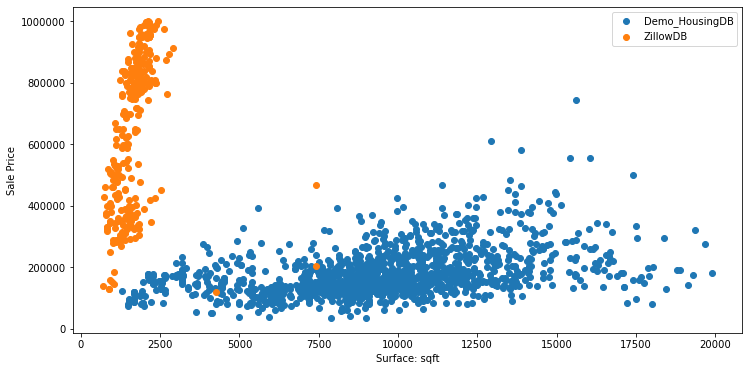

In [43]:
import matplotlib.pyplot as plt
import numpy as np
demoDB_filtered = clean_area.loc[(clean_area["SalePrice"] < 1000000) & (clean_area["LotArea"] < 20000)]
Zillow_filtered = zillow_dataframe.loc[(zillow_dataframe["SalePrice"] < 1000000) & (zillow_dataframe["LotArea"] < 20000)]

plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.scatter(x = 'LotArea', y = 'SalePrice', data = demoDB_filtered)
plt.scatter(x = 'LotArea', y = 'SalePrice', data = Zillow_filtered)
plt.legend(["Demo_HousingDB", "ZillowDB"])
plt.xlabel('Surface: sqft')
plt.ylabel('Sale Price')

Comparing the summaries of 2007 in demo_housing and the year of 2017 in Zillow
- 150 random sample were taken

In [44]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)
clean_2007['SalePrice'].sample(n=120, random_state=1).describe().T

count      120.00000
mean    181637.65833
std      75638.42378
min      39300.00000
25%     128875.00000
50%     169000.00000
75%     225000.00000
max     466500.00000
Name: SalePrice, dtype: float64

In [45]:
#pd.set_option('display.float_format', lambda x: '%.5f' %x) #suppress scientific notation
randsam = zillow_dataframe['SalePrice'].sample(n = 150, random_state=1)
randsam.describe().T

count       120.00000
mean     959579.71667
std      637577.77572
min      129000.00000
25%      498250.00000
50%      834625.00000
75%     1168750.00000
max     4200000.00000
Name: SalePrice, dtype: float64

clean_bed = zillow_dataframe[['BedroomAbvGr', 'SalePrice']].dropna()
sample_bed1 = clean_bed['BedroomAbvGr'].sample(n=120, random_state=1)

clean_bed2 = housing_dataframe[['BedroomAbvGr', 'SalePrice']].dropna()
sample_bed2 = clean_bed2['BedroomAbvGr'].sample(n=120, random_state=1)

#fig, ax = plt.subplots()

#index = np.arange(len(sample_bed2['BedroomAbvGr']))
#bar_width = 0.35
#opacity = 0.8

#ax.bar(index, clean_bed[clean_bed['BedroomAbvGr'] == 4], color='r', align='edge', width=bar_width, label = 'Station One')
#ax.bar(index, sample_bed1['SalePrice'], color='b', align='edge', width=-bar_width,label = 'Station Two')

# Assign the tick labels
#ax.set_xticks(index)
#ax.set_xticklabels(sample_bed2['BedroomAbvGr'], rotation=90)

#plt.xlabel('Category Instrumentation')
plt.ylabel('Qtd Instrumentation')
plt.legend()
plt.show()

df = pd.merge(clean_bed ,clean_bed2, on = 'BedroomAbvGr')
df1 = df[df['BedroomAbvGr'] == 4]
#df.plot.bar(x='BedroomAbvGr')
#year_2007 = housing_dataframe[housing_dataframe['YrSold'] == 2007]